# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [55]:
# imports
import panel as pn
from panel.interact import interact
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path
from dotenv import load_dotenv


In [56]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [57]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [58]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_by_year = to_data.groupby('year').sum()
dwelling_by_year.drop(['average_house_value','shelter_costs_owned','shelter_costs_rented'], axis = 1, inplace =True)
#dwelling_by_year = pd.pivot_table(to_data, values=['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'apartment_five_storeys_less', 'other_house'], index='year',aggfunc=[np.sum]).reset_index()
#dwelling_by_year.set_index('year')
dwelling_by_year

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [59]:
# Save the dataframe as a csv file
dwelling_by_year.to_csv("dwelling_by_year.csv", index=False) 

<AxesSubplot:xlabel='year'>

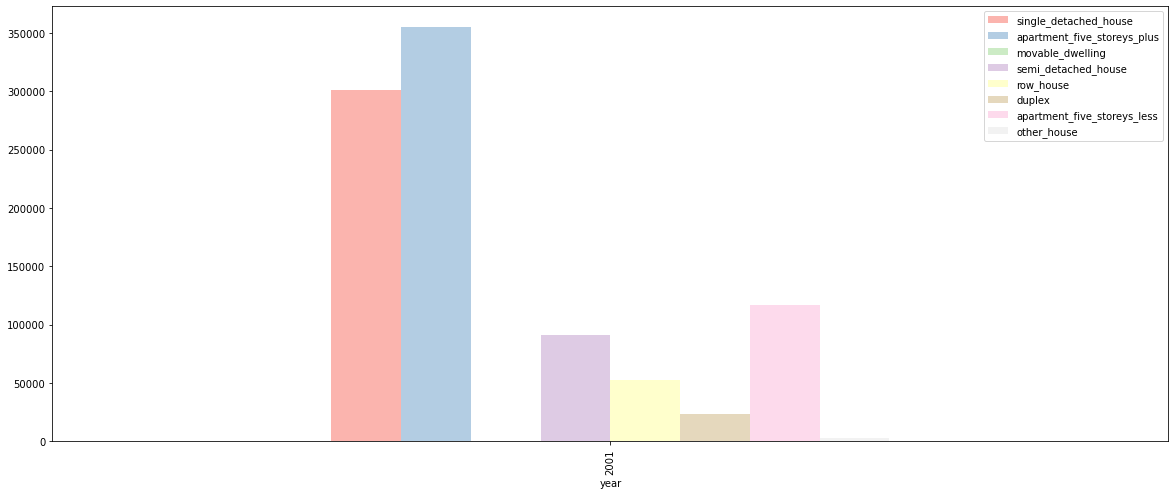

In [60]:
# Create a bar chart per year to show the number of dwelling types
y2001 = [2001]
y2006 = [2006]
y2011 = [2011]
y2016 = [2016]

filter_df  = dwelling_by_year.loc[ dwelling_by_year.index.intersection(y2001) ]
#filter_df.hvplot.bar(width=900, height=600,colormap='viridis', ylabel='Dwelling Types', title='Dwelling Types in Toronto in 2001').opts(xrotation=45)
filter_df.plot(kind='bar', figsize=(20,8), colormap = 'Pastel1')

<AxesSubplot:xlabel='year'>

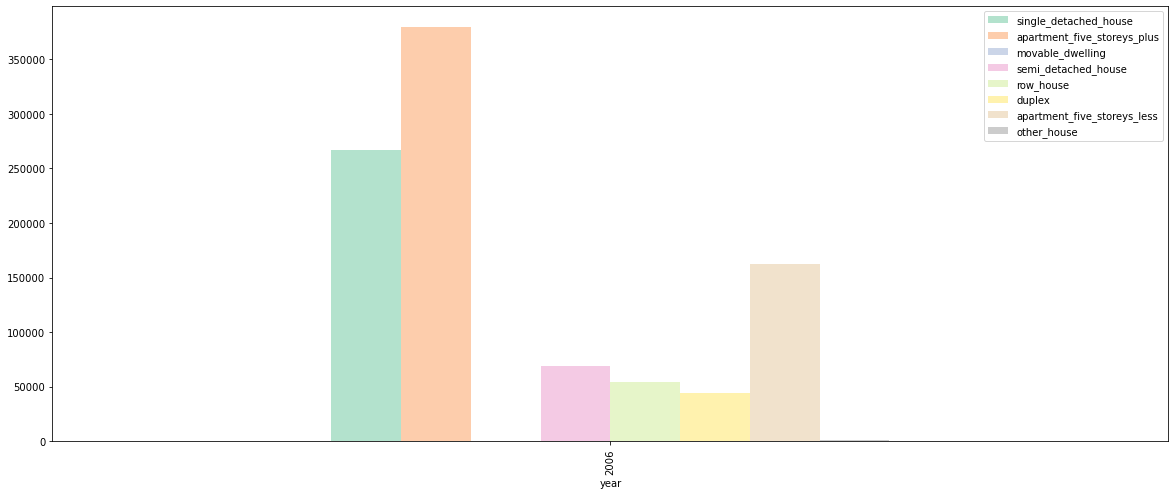

In [61]:
# Bar chart for 2006
filter_df  = dwelling_by_year.loc[ dwelling_by_year.index.intersection(y2006) ]
#filter_df.hvplot.bar(width=900, height=600,colormap='blues', ylabel='Dwelling Types', title='Dwelling Types in Toronto in 2006').opts(xrotation=45)
filter_df.plot(kind='bar', figsize=(20,8), colormap = 'Pastel2')

<AxesSubplot:xlabel='year'>

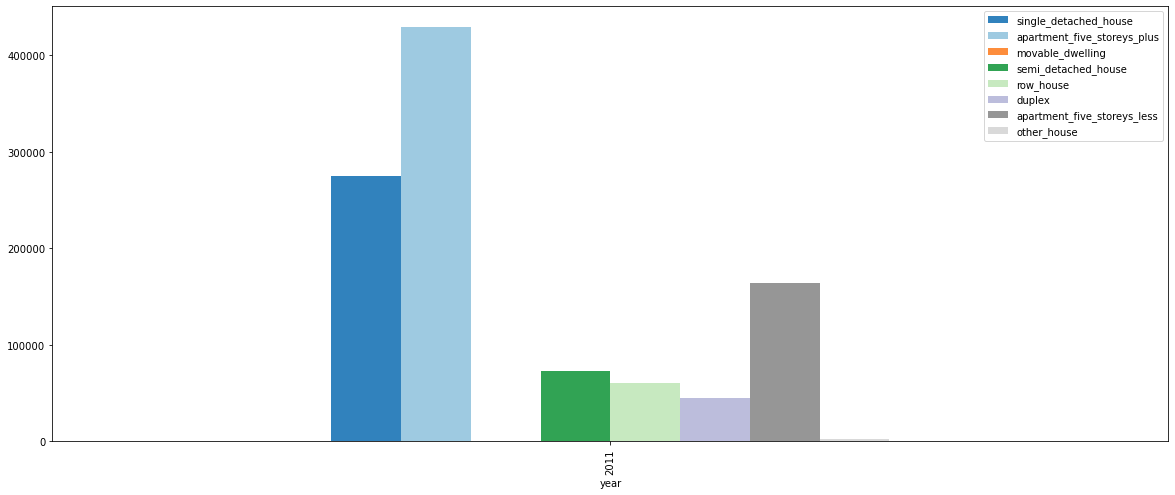

In [62]:
filter_df  = dwelling_by_year.loc[ dwelling_by_year.index.intersection(y2011) ]
#filter_df.hvplot.bar(width=900, height=600,colormap='greens', ylabel='Dwelling Types', title='Dwelling Types in Toronto in 2011').opts(xrotation=45)
filter_df.plot(kind='bar', figsize=(20,8), colormap = 'tab20c')

<AxesSubplot:xlabel='year'>

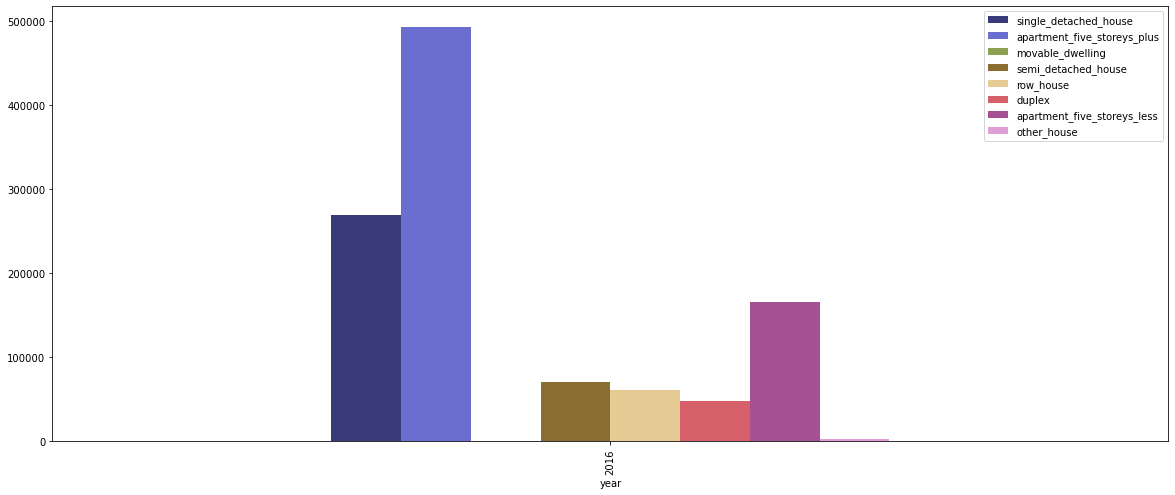

In [63]:
filter_df  = dwelling_by_year.loc[ dwelling_by_year.index.intersection(y2016) ]
#filter_df.hvplot.bar(width=900, height=600,colormap='oranges', ylabel='Dwelling Types', title='Dwelling Types in Toronto in 2016').opts(xrotation=45)
filter_df.plot(kind='bar', figsize=(20,8), colormap = 'tab20b')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [64]:
# Calculate the average monthly shelter costs for owned and rented dwellings
monthly_shelter_cost = to_data.groupby('year').mean()
monthly_shelter_cost['shelter_costs_owned']/12

year
2001     70.573214
2006    109.733333
2011    120.684524
2016    146.776190
Name: shelter_costs_owned, dtype: float64

In [65]:
monthly_cost = to_data.groupby('year').sum()
monthly_cost = monthly_cost[['shelter_costs_owned', 'shelter_costs_rented']]
monthly_cost

,shelter_costs_owned,shelter_costs_rented
year,,
2001,118563,152031
2006,184352,129558
2011,202750,142771
2016,246584,175885


In [66]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
monthly_cost[['shelter_costs_owned']].hvplot(title='Monthly Shelter Cost, Owned')

:Curve   [year]   (shelter_costs_owned)

In [67]:
monthly_cost[['shelter_costs_rented']].hvplot(title='Monthly Shelter Cost, Rented')

:Curve   [year]   (shelter_costs_rented)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [68]:
# Calculate the average house value per year
average_house_value = to_data.groupby('year').mean()
average_house_value['average_house_value']

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

<AxesSubplot:title={'center':'Average House Value'}, xlabel='year'>

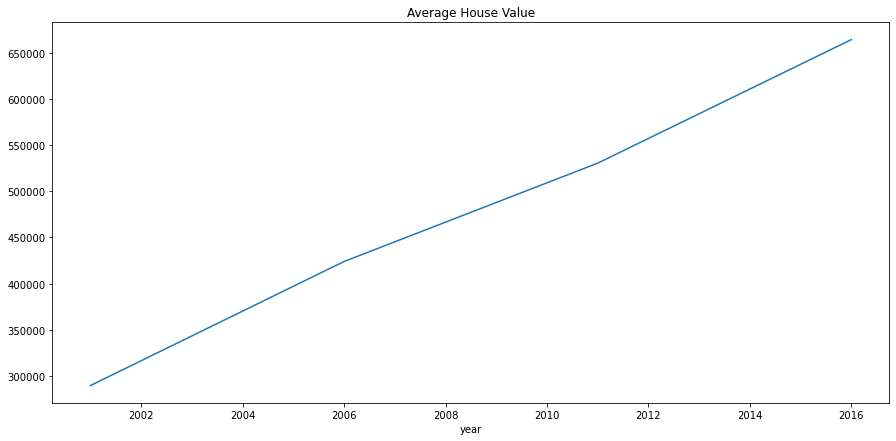

In [69]:
# Plot the average house value per year as a line chart
average_house_value['average_house_value'].plot(kind='line', title='Average House Value', figsize=(15,7))

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [70]:
# Create a new DataFrame with the mean house values by neighbourhood per year

avg_house_val = pd.pivot_table(to_data, values = 'average_house_value', index=['year', 'neighbourhood']).reset_index()

In [71]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

avg_house_val.hvplot(x='year', y='average_house_value', kind='line', groupby='neighbourhood')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [72]:
# Fetch the data of all dwelling types per year
avg_dwelling_by_year = to_data

avg_dwelling_by_year['avg'] = avg_dwelling_by_year['single_detached_house'] + avg_dwelling_by_year['apartment_five_storeys_plus'] + avg_dwelling_by_year['apartment_five_storeys_plus'] + avg_dwelling_by_year['movable_dwelling'] + avg_dwelling_by_year['semi_detached_house'] + avg_dwelling_by_year['row_house'] + avg_dwelling_by_year['duplex'] + avg_dwelling_by_year['apartment_five_storeys_less']  + avg_dwelling_by_year['other_house'] 
avg_dwelling_by_year.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis = 1)


,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,avg
year,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,9410
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,8450
2001,Alderwood,3175,315,0,470,50,185,370,0,4880
2001,Annex,1060,6090,5,1980,605,275,3710,165,19980
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,14540
...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,7190
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,7670
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,11320


In [73]:
avg_dwelling_by_year['avg'] = avg_dwelling_by_year['avg'] = avg_dwelling_by_year['avg'] / (len(avg_dwelling_by_year.columns)-1)


In [74]:
avg_dwelling_by_year1 = avg_dwelling_by_year
avg_dwelling_by_year2 = avg_dwelling_by_year1
avg_dwelling_by_year1.drop(['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'apartment_five_storeys_less', 'other_house', 'average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1)


,neighbourhood,duplex,avg
year,,,
2001,Agincourt North,195,784.166667
2001,Agincourt South-Malvern West,105,704.166667
2001,Alderwood,185,406.666667
2001,Annex,275,1665.000000
2001,Banbury-Don Mills,15,1211.666667
...,...,...,...
2016,Wychwood,395,599.166667
2016,Yonge-Eglinton,310,639.166667
2016,Yonge-St.Clair,130,943.333333


In [75]:
avg_dwelling_by_year

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,avg
year,,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870,784.166667
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892,704.166667
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924,406.666667
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378,1665.000000
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163,1211.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146,599.166667
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535,639.166667
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619,943.333333


In [76]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_dwelling_by_year1.hvplot( y='avg', kind='line', groupby='neighbourhood', colormap='blue')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (avg)

In [77]:
avg_dwelling_by_year2.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented','avg'], axis = 1, inplace=True)

In [78]:
avg_dwelling_by_year2.hvplot(kind='bar', x='year',  groupby='neighbourhood', colormap='seismic', rot=90, width=900, height=600)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [79]:
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data1 = pd.read_csv(file_path, index_col="year")
to_data1.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [80]:
top_10 = to_data1

top_10['avg'] = top_10['single_detached_house'] + top_10['apartment_five_storeys_plus'] + top_10['apartment_five_storeys_plus'] + top_10['movable_dwelling'] + top_10['semi_detached_house'] + top_10['row_house'] + top_10['duplex'] + top_10['apartment_five_storeys_less']  + top_10['other_house']
top_10['avg'] = top_10['avg'] / (len(top_10.columns)-4)

top_10_nbh = top_10.groupby('neighbourhood').sum('avg')


In [81]:
top_10_nbh.drop(['single_detached_house', 'apartment_five_storeys_plus', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house','average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis = 1,inplace=True)

In [82]:
top_10_val = top_10_nbh.sort_values('avg', ascending=False).head(10)

In [83]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_val.hvplot(kind='bar', x='neighbourhood',   colormap='seismic', rot=90, width=900, height=600)


:Bars   [neighbourhood]   (avg)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

In [84]:
neighbourhood_val = top_10_nbh
neighbourhood_val

,avg
neighbourhood,
Agincourt North,4743.333333
Agincourt South-Malvern West,4122.222222
Alderwood,2176.111111
Annex,9891.111111
Banbury-Don Mills,7388.333333
...,...
Wychwood,3129.444444
Yonge-Eglinton,3097.777778
Yonge-St.Clair,4705.555556


### Load Location Data

In [85]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path, index_col='neighbourhood')
df_neighbourhood_locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [86]:
# Calculate the mean values for each neighborhood
neighbourhood_val = top_10_nbh #grabbed the mean value from another df already done in section top 10
neighbourhood_val


,avg
neighbourhood,
Agincourt North,4743.333333
Agincourt South-Malvern West,4122.222222
Alderwood,2176.111111
Annex,9891.111111
Banbury-Don Mills,7388.333333
...,...
Wychwood,3129.444444
Yonge-Eglinton,3097.777778
Yonge-St.Clair,4705.555556


In [87]:
# Join the average values with the neighbourhood locations
neighbourhood_map = pd.concat([neighbourhood_val, df_neighbourhood_locations], join='inner', axis=1)
neighbourhood_map.reset_index(inplace=True)

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [88]:
# Create a scatter mapbox to analyze neighbourhood info
map_1 = px.scatter_mapbox(
    neighbourhood_map,
    lat="lat",
    lon="lon",
    color="avg",
    mapbox_style="open-street-map"
)
map_1.show()

- - -